<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-2-Sprint-4-Practicing-Understanding/blob/master/Connor_Heraty_Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizations

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drawing Tangent Lines on cost function.

In [23]:
from ipywidgets import interact

def check_slope(x=np.random.uniform(-1,1)):
    # Plot f(x) = x ** 2
    xs = np.linspace(start=-1, stop=1)
    squares = xs ** 2
    plt.plot(xs, squares)
    plt.xlabel('x')
    plt.ylabel('f(x) = x ** 2')

    # plot point at x, f(x)
    y = x**2
    plt.scatter(x, y)
    
    # calculate derivative
    derivative = 2*x
    print('Gradient:', derivative)
    
    if derivative > 0:
        print('Shift to the left')
        
    elif derivative < 0:
        print('Shift to the right')
        
    else:
        print(f'x={x} minimizes the value of this function')
        
    def line(xs, x, y):
      return derivative*(xs - x) + y
    
    # Define x data range for tangent line
    xrange = np.linspace(x-1, x+1, 2)
    
    plt.plot(xrange, line(xrange, x, y), 'C1--', linewidth = 2)
    
    
    #plt.plot([0,derivative])
    
interact(check_slope, x=(-1,1,0.1));

interactive(children=(FloatSlider(value=0.3999367626157908, description='x', max=1.0, min=-1.0), Output()), _d…

Drawing Tangent Lines on Cost Function showing multiple iterations.

In [35]:
def gradient_descent(start_at=np.random.uniform(-1,1), 
                     iterations=20, 
                     learning_rate=0.1):
    
    # plot f(x) = x**2
    xs = np.linspace(start=-1, stop=1)
    squares = xs ** 2
    plt.plot(xs, squares, color='grey')
    plt.xlabel('x')
    plt.ylabel('f(x) == x ** 2')
    
    x = start_at
    xrange = np.linspace(x-1, x+1, 3)
    
    def line(xs, x, y):
        return gradient*(xs - x) + y
    
    for _ in range(iterations):
      
        gradient = 2*x  # derivative of f(x) = x**2
        x += learning_rate * -gradient
        y = x**2
        plt.scatter(x, y, color='grey', edgecolor='black', zorder=3)
        plt.plot(xrange, line(xrange, x, y), '--', linewidth = 2)
        
interact(gradient_descent, start_at=(-1,1,0.5), iterations=(1,20,1), 
         learning_rate=(0.05,0.96,0.05));

interactive(children=(FloatSlider(value=-0.15448050614196562, description='start_at', max=1.0, min=-1.0, step=…

Recreated Cole Hudsons Rosenbrock visualization.

- Learned how to properly use the *args parameter
- Went through the code very slowly (did not just copy paste)

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [0]:
def derivative(f):
    def df(x, h=0.1e-10): 
        return (f(x+h)-f(x-h))/(2*h)
    return df

def partial_derivative(f, nth=0, h=0.001e-10):
    def partial(*xs):
        dxs = list(xs)
        dxs[nth] = xs[nth] + h
        return (f(*dxs)-f(*xs))/h
    return partial

def gradient(f):
    def grad(*xs):
        return [partial_derivative(f, n)(*xs) for n in range(len(xs))]
    return grad
    
def rosenbrock(X, Y):
    a = np.sin((0.5*(X**2)) - (0.25*(Y**2)) + 3) 
    b = np.cos((2*X) + 1 - np.exp(Y))
    return a * b

In [0]:
grad_of_rosenbrock = gradient(rosenbrock)
learning_rate = 0.4

# Rosenbrock manifold
X = np.linspace(-2, 2, 100)
Y = np.linspace(-4, 0, 100)

X, Y = np.meshgrid(X, Y)
Z = rosenbrock(X, Y)

In [0]:
# Starting Point
x = np.array([0])
y = np.array([-2])
xy = np.array([x, y])
z = rosenbrock(*xy)

xy_1 = xy - learning_rate*np.array(grad_of_rosenbrock(*xy))
x_1, y_1 = xy_1
z_1 = rosenbrock(x_1, y_1)

xy_2 = xy_1 - learning_rate*np.array(grad_of_rosenbrock(*xy_1))
x_2, y_2 = xy_2
z_2 = rosenbrock(x_2, y_2)

xy_3 = xy_2 - learning_rate*np.array(grad_of_rosenbrock(*xy_2))
x_3, y_3 = xy_3
z_3 = rosenbrock(x_3, y_3)

xy_4 = xy_3 - learning_rate*np.array(grad_of_rosenbrock(*xy_3))
x_4, y_4 = xy_4
z_4 = rosenbrock(x_4, y_4)

xy_5 = xy_4 - learning_rate*np.array(grad_of_rosenbrock(*xy_4))
x_5, y_5 = xy_5
z_5 = rosenbrock(x_5, y_5)

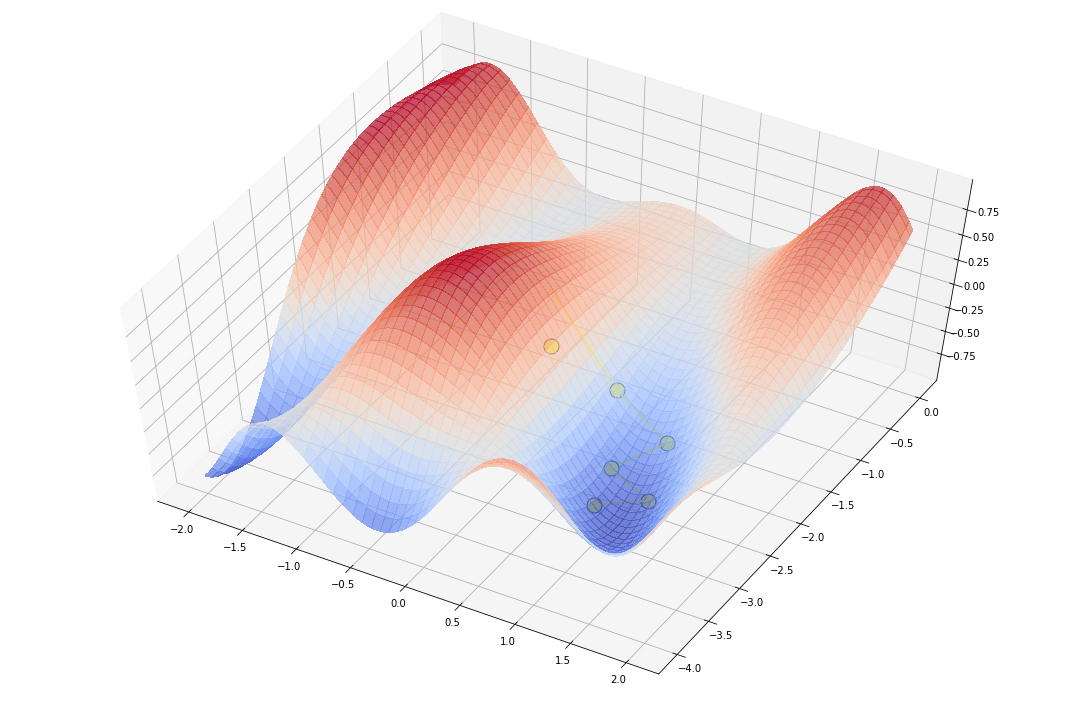

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def derivative(f):
    def df(x, h=0.1e-10): 
        return (f(x+h)-f(x-h))/(2*h)
    return df

def partial_derivative(f, nth=0, h=0.001e-10):
    def partial(*xs):
        dxs = list(xs)
        dxs[nth] = xs[nth] + h
        return (f(*dxs)-f(*xs))/h
    return partial

def gradient(f):
    def grad(*xs):
        return [partial_derivative(f, n)(*xs) for n in range(len(xs))]
    return grad
    
def rosenbrock(X, Y):
    a = np.sin((0.5*(X**2)) - (0.25*(Y**2)) + 3) 
    b = np.cos((2*X) + 1 - np.exp(Y))
    return a * b
    
grad_of_rosenbrock = gradient(rosenbrock)
learning_rate = 0.4

# Rosenbrock manifold
X = np.linspace(-2, 2, 100)
Y = np.linspace(-4, 0, 100)

X, Y = np.meshgrid(X, Y)
Z = rosenbrock(X, Y)

# Starting Point
x = np.array([0])
y = np.array([-2])
xy = np.array([x, y])
z = rosenbrock(*xy)

xy_1 = xy - learning_rate*np.array(grad_of_rosenbrock(*xy))
x_1, y_1 = xy_1
z_1 = rosenbrock(x_1, y_1)

xy_2 = xy_1 - learning_rate*np.array(grad_of_rosenbrock(*xy_1))
x_2, y_2 = xy_2
z_2 = rosenbrock(x_2, y_2)

xy_3 = xy_2 - learning_rate*np.array(grad_of_rosenbrock(*xy_2))
x_3, y_3 = xy_3
z_3 = rosenbrock(x_3, y_3)

xy_4 = xy_3 - learning_rate*np.array(grad_of_rosenbrock(*xy_3))
x_4, y_4 = xy_4
z_4 = rosenbrock(x_4, y_4)

xy_5 = xy_4 - learning_rate*np.array(grad_of_rosenbrock(*xy_4))
x_5, y_5 = xy_5
z_5 = rosenbrock(x_5, y_5)

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.7)
ax.plot(x, y, z, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x, x_1]), np.concatenate([y, y_1]), np.concatenate([z, z_1]), linewidth=2, color='yellow')
ax.plot(x_1, y_1, z_1, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x_1, x_2]), np.concatenate([y_1, y_2]), np.concatenate([z_1, z_2]), linewidth=2, color='yellow')
ax.plot(x_2, y_2, z_2, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x_2, x_3]), np.concatenate([y_2, y_3]), np.concatenate([z_2, z_3]), linewidth=2, color='yellow')
ax.plot(x_3, y_3, z_3, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x_3, x_4]), np.concatenate([y_3, y_4]), np.concatenate([z_3, z_4]), linewidth=2, color='yellow')
ax.plot(x_4, y_4, z_4, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)
ax.plot(np.concatenate([x_4, x_5]), np.concatenate([y_4, y_5]), np.concatenate([z_4, z_5]), linewidth=2, color='yellow')
ax.plot(x_5, y_5, z_5, 'o', c='yellow', markersize=15, markeredgecolor='black', markeredgewidth=1)

ax.view_init(60, -60)

plt.tight_layout()